# 0004.003 EDA - Odds as Implied Probabilities

In [1]:
import pathlib
# import os
import sys
# import pickle
# import inspect

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ptitprince as pt

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 2
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

from src.visualization.visualize import extend_cols

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA_FP = PROJECT_DIR / 'data' / 'reference' / 'eda' / 'sample.csv'

## Data Load & Cut to Bookmakers Odds for a Single Season

In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date']).sort_values(by=['date', 'h', 'a'])
odds_cols = [col for col in df_orig.columns if 'OddsLb' in col]
cols = extend_cols(odds_cols)
df_orig = df_orig[cols]
df_orig = df_orig[df_orig['season'] == '2007-2008']
df_orig.rename(columns={'hwinOddsLb': 'hwinOdds', 'drawOddsLb': 'drawOdds', 'awinOddsLb': 'awinOdds'}, inplace=True)
df_orig.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result,awinOdds,drawOdds,hwinOdds
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw,3.0,3.20,2.10
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin,11.0,5.00,1.20
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw,2.0,3.20,3.20
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin,2.6,3.20,2.37
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin,2.4,3.25,2.50


## Covert Odds to Probabilities and Normalize

In [3]:
df = df_orig.copy(deep=True)
# tot includes the bookie's overround
tot = 1/df['hwinOdds'] + 1/df['drawOdds'] + 1/df['awinOdds']
hwin = 1/df['hwinOdds']/tot; draw = 1/df['drawOdds']/tot; awin = 1/df['awinOdds']/tot
print("The bookie's overround means that the `probabilities` sum up to larger than 1")
print(tot[0:5],'\n')
print('We normalize the probabilities by dividing by the sum so we get 3 numbers that sum to 1')
print('Implied Home Win Probabilities')
print(hwin[0:5])
print('Implied Draw Probabilities')
print(draw[0:5])
print('Implied Away Win Probabilities')
print(awin[0:5])
print('Sum of Implied Probabilities')
print(hwin[0:5] + draw[0:5] + awin[0:5])

The bookie's overround means that the `probabilities` sum up to larger than 1
0    1.122024
1    1.124242
2    1.125000
3    1.119056
4    1.124359
dtype: float64 

We normalize the probabilities by dividing by the sum so we get 3 numbers that sum to 1
Implied Home Win Probabilities
0    0.424403
1    0.741240
2    0.277778
3    0.377051
4    0.355758
dtype: float64
Implied Draw Probabilities
0    0.278515
1    0.177898
2    0.277778
3    0.279253
4    0.273660
dtype: float64
Implied Away Win Probabilities
0    0.297082
1    0.080863
2    0.444444
3    0.343696
4    0.370582
dtype: float64
Sum of Implied Probabilities
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [4]:
prob_cols = ['p(hwin)', 'p(draw)', 'p(awin)']
df[prob_cols[0]] = hwin ; df[prob_cols[1]] = draw ; df[prob_cols[2]] = awin

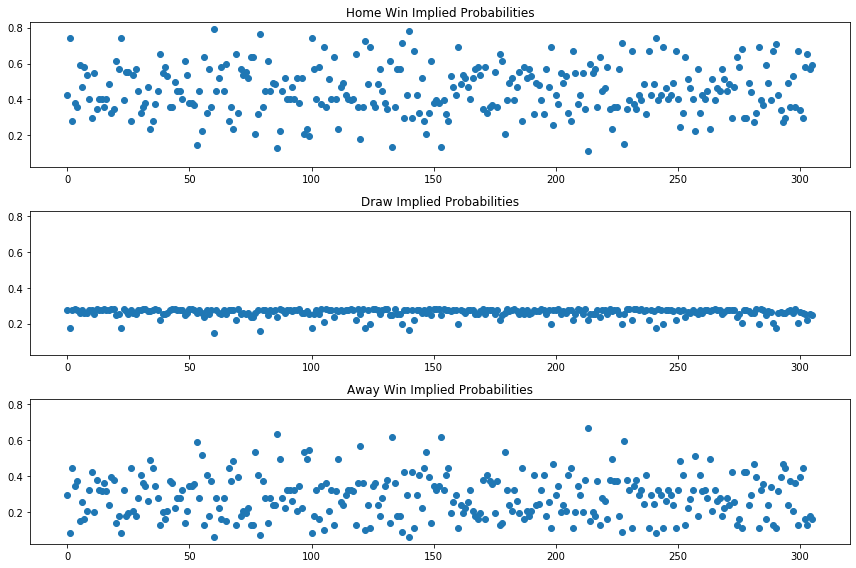

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(12,8), sharey=True)
ax1.set_title('Home Win Implied Probabilities')
ax1.plot(hwin, 'o')
ax2.set_title('Draw Implied Probabilities')
ax2.plot(draw, 'o')
ax3.set_title('Away Win Implied Probabilities')
ax3.plot(awin, 'o')
plt.tight_layout()
plt.show()

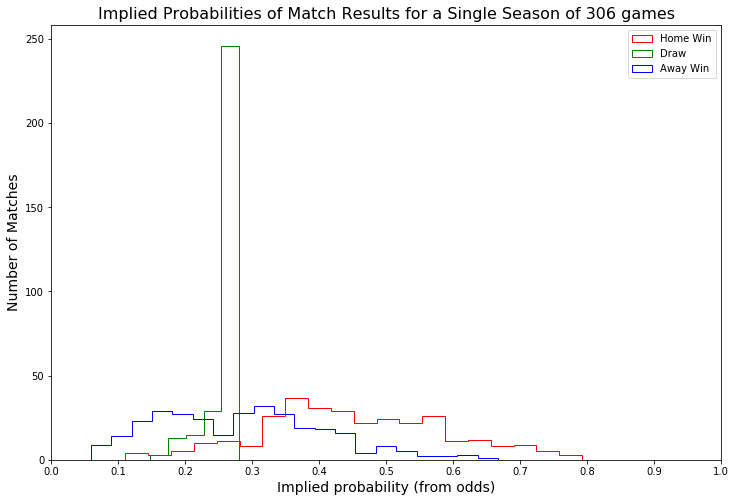

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
bins=20
ax.hist(hwin, histtype='step', bins=bins, color='red', density=False, label='Home Win')
ax.hist(draw, histtype='step', bins=5, color='green', density=False, label='Draw', alpha=1.0)
ax.hist(awin, histtype='step', bins=bins, color='blue', density=False, label='Away Win')
ax.set_xlim(0,1.0, 0.1)
ax.set_xticks(np.linspace(0, 1.0, 11))
ax.set_xlabel('Implied probability (from odds)', fontsize=14)
ax.set_ylabel('Number of Matches', fontsize=14)
ax.set_title(f'Implied Probabilities of Match Results for a Single Season of {hwin.shape[0]} games', fontsize=16)


plt.legend()
plt.show();

In [7]:
long_df = pd.melt(df[prob_cols], value_vars=prob_cols, var_name='p(result)', value_name='Implied Probability')
long_df.head()

,p(result),Implied Probability
0,p(hwin),0.424403
1,p(hwin),0.741240
2,p(hwin),0.277778
3,p(hwin),0.377051
4,p(hwin),0.355758


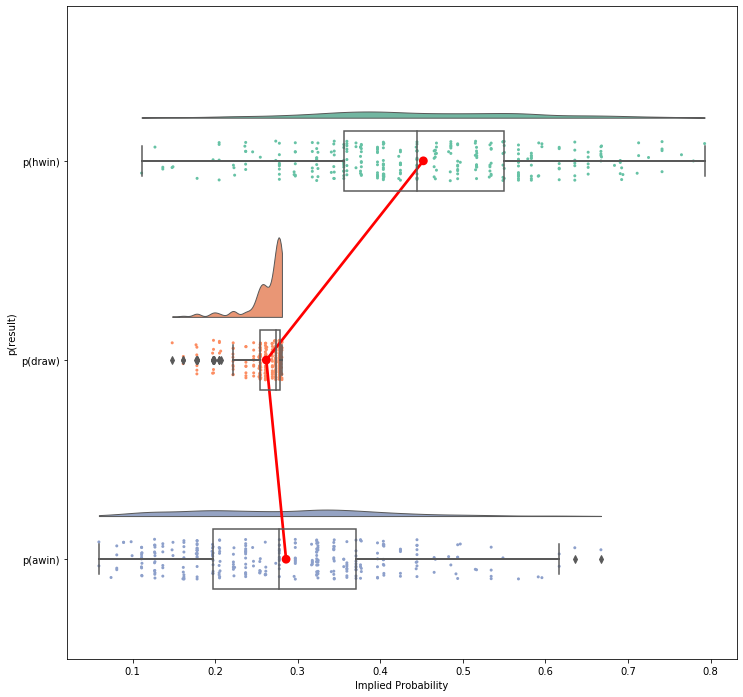

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
ax = pt.RainCloud(x='p(result)', y='Implied Probability', data=long_df, width_viol=0.8, width_box=0.3,
                  orient='h', pointplot=True)
plt.show();

In [9]:
df[prob_cols].describe()

,p(hwin),p(draw),p(awin)
count,306.000000,306.000000,306.000000
mean,0.452151,0.261952,0.285897
std,0.137542,0.024597,0.122255
min,0.110926,0.147992,0.059197
25%,0.355758,0.254585,0.196822
50%,0.444444,0.273292,0.277778
75%,0.550122,0.277978,0.370582
max,0.792812,0.280899,0.667223


## Comments

+ The hard limit on a draw probability is striking - In any game, there is never more than a 0.28 probability of a draw ! Is this right?
+ The minimum probability of a home win is 0.11 - So there is never a 0.9 probability of a home win ?
+ As above for away win
+ These probabilities are interesting at their limits
